In [4]:
import pandas as pd

profis_scores = pd.read_csv('D2/gnina_out_preds_ECFP/scores.csv')['score']
chembl_scores = pd.read_csv('D2/gnina_out_chembl/scores.csv')['score']

/home/bmc/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bmc/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bmc/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bmc/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='score', ylabel='Density'>

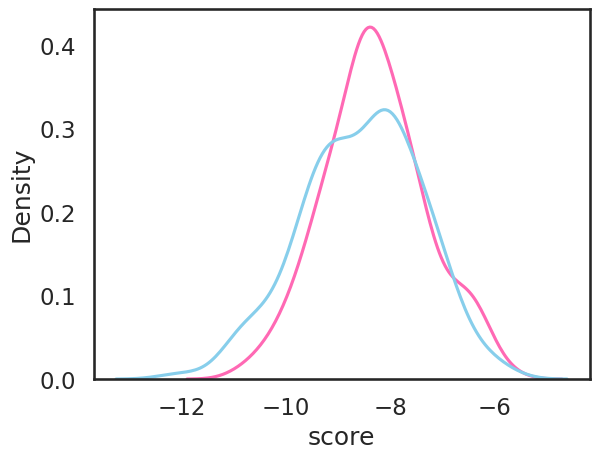

In [8]:
# plot the scores distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('talk')

sns.kdeplot(profis_scores, color='hotpink', label='Profis')
sns.kdeplot(chembl_scores, color='skyblue', label='ChEMBL')